## <center>Movielens Case Study</center>

This project was completed as a part of Simplilearn Data Science with Python course.

In this Project, we have to perform the analysis using the Exploratory Data Analysis technique. We need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

### Description:
The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

In [1]:
# Import the required library for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

- Import the three datasets - Users, movies, ratings


In [2]:
# Import the dataset

users_data = pd.read_csv("users.dat", sep="::", header=None, names = ['UserID','Gender','Age','Occupation','Zip-code'],
                         dtype={'UserID': np.int32, 'Gender': np.str, 'Age': np.int32, 'Occupation' : np.int32,
                                'Zip-code' : np.str},engine='python')

movie_data = pd.read_csv("movies.dat",sep="::", header=None, names=['MovieID','Title','Genres'],
                         dtype={'MovieID': np.int32, 'Title': np.str, 'Genres': np.str}, engine='python')

ratings_data = pd.read_csv("ratings.dat", sep="::", header=None, names=['UserID','MovieID','Rating','Timestamp'],
                           dtype={'UserID': np.int32, 'MovieID': np.int32, 'Rating': np.int32, 'Timestamp' : np.str}, engine='python')


In [3]:
# Analyase the users dataset
users_data.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
# checking the user dataset info
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int32 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int32 
 3   Occupation  6040 non-null   int32 
 4   Zip-code    6040 non-null   object
dtypes: int32(3), object(2)
memory usage: 165.3+ KB


In [5]:
users_data.shape

(6040, 5)

In [6]:
users_data.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [7]:
# Analyse the movie dataset
movie_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
# Checking the movie dataset info
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int32 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int32(1), object(2)
memory usage: 76.0+ KB


In [9]:
movie_data.shape

(3883, 3)

In [10]:
movie_data.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [11]:
# Analyse the rating dataset
ratings_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [12]:
# Checking the rating dataset info
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   UserID     1000209 non-null  int32 
 1   MovieID    1000209 non-null  int32 
 2   Rating     1000209 non-null  int32 
 3   Timestamp  1000209 non-null  object
dtypes: int32(3), object(1)
memory usage: 19.1+ MB


In [13]:
ratings_data.shape

(1000209, 4)

In [14]:
ratings_data.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

- Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating.

In [15]:
# Merge the Users dataset and rating dataset using pd.merge

Master_Data = pd.merge(users_data, ratings_data, on='UserID')
Master_Data.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291


In [16]:
# Merge the movie Dataset and master dataset 
Master_Data = pd.merge(Master_Data, movie_data, on='MovieID')
Master_Data.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [17]:
# Preparing the master dataset as required
Master_Data = Master_Data.drop(['Zip-code'], axis=1)
Master_Data = Master_Data.drop(['Timestamp'], axis=1)

In [18]:
Master_Data = Master_Data[['UserID','Gender','Age','Occupation','MovieID','Title','Genres','Rating']]
Master_Data.head()

,UserID,Gender,Age,Occupation,MovieID,Title,Genres,Rating
0,1,F,1,10,1193,One Flew Over the Cuckoo's Nest (1975),Drama,5
1,2,M,56,16,1193,One Flew Over the Cuckoo's Nest (1975),Drama,5
2,12,M,25,12,1193,One Flew Over the Cuckoo's Nest (1975),Drama,4
3,15,M,25,7,1193,One Flew Over the Cuckoo's Nest (1975),Drama,4
4,17,M,50,1,1193,One Flew Over the Cuckoo's Nest (1975),Drama,5


### Explore the datasets using visual representations

1. User Age Distribution

In [19]:
age_count = users_data['Age'].value_counts()
age_count

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: Age, dtype: int64

In [20]:
age_Category = ('Under 18','18-24','25-34','35-44','45-49','50-55','56+')
x_position = np.arange(len(age_Category))
x_position

array([0, 1, 2, 3, 4, 5, 6])

In [21]:
age_values = [age_count[1],age_count[18],age_count[25],age_count[35],age_count[45],age_count[50],age_count[56]]
age_values

[222, 1103, 2096, 1193, 550, 496, 380]

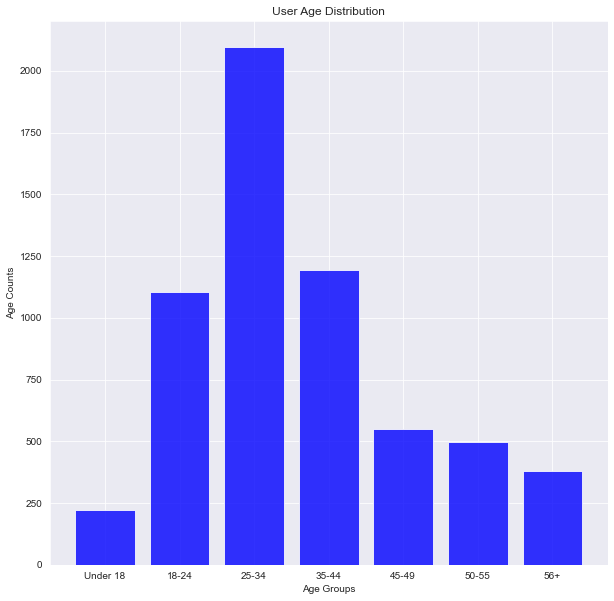

In [22]:
# Plot the bar chart for Age Distribution

# style.use('ggplot')
plt.figure(figsize=(10,10))
plt.bar(x_position, age_values, align='center', color='b', alpha=0.8)
plt.xlabel("Age Groups")
plt.ylabel("Age Counts")
plt.xticks(x_position, age_Category)
plt.title('User Age Distribution')
plt.show()

In the above User-Age-Distribution, it shows that most of the users form 25-34 years old.

2. User rating of the movie “Toy Story”

In [23]:
# Get the movie ID of 'Toy Story' form movie_data

movie_data.MovieID[movie_data.Title == 'Toy Story (1995)']

0    1
Name: MovieID, dtype: int32

In [27]:
# Fetch the rating data of "Toy Story"
toyStory_data = ratings_data[ratings_data.MovieID == 1]
toyStory_data.head(10)

,UserID,MovieID,Rating,Timestamp
40,1,1,5,978824268
469,6,1,4,978237008
581,8,1,4,978233496
711,9,1,5,978225952
837,10,1,5,978226474
1966,18,1,4,978154768
2276,19,1,5,978555994
2530,21,1,3,978139347
2870,23,1,4,978463614
3405,26,1,3,978130703


In [29]:
toyStory_movie_rating = toyStory_data.groupby('Rating').size()
toyStory_movie_rating

Rating
1     16
2     61
3    345
4    835
5    820
dtype: int64

In [30]:
ratings_type = ('1','2','3','4','5')
x_pos = np.arange(len(ratings_type))
x_pos

array([0, 1, 2, 3, 4])

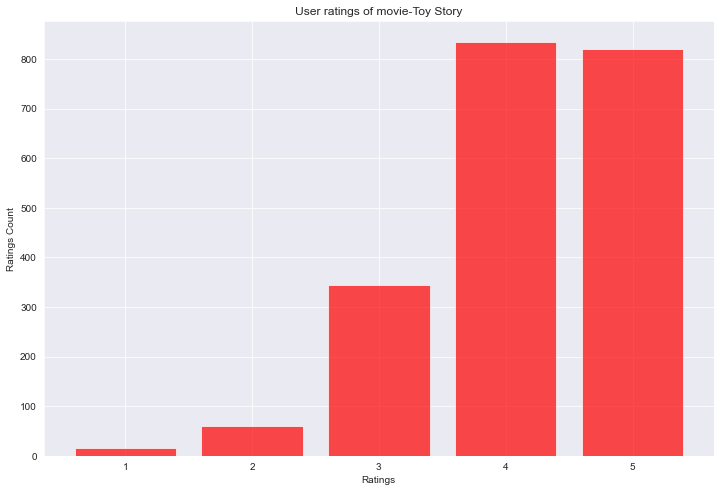

In [34]:
# Plot the bar chart for User rating of 'Toy Story'
plt.figure(figsize=(12,8))
plt.bar(x_pos, toyStory_movie_rating, align='center', color='r', alpha=0.7)
plt.xlabel('Ratings')
plt.ylabel('Ratings Count')
plt.xticks(x_pos, ratings_type)
plt.title('User ratings of movie-Toy Story')
plt.show()

In the above graph shows that 'Toy Story' movie has got 4-star rating maximum.

3. Top 25 movies by viewership rating

In [39]:
# Fetch Movie rating Data
movie_rating = Master_Data.groupby(['Title'], as_index=False)

average_movie_ratings = movie_rating.agg({'Rating':'mean'})
average_movie_ratings.head(10)

,Title,Rating
0,"$1,000,000 Duck (1971)",3.027027
1,'Night Mother (1986),3.371429
2,'Til There Was You (1997),2.692308
3,"'burbs, The (1989)",2.910891
4,...And Justice for All (1979),3.713568
5,1-900 (1994),2.500000
6,10 Things I Hate About You (1999),3.422857
7,101 Dalmatians (1961),3.596460
8,101 Dalmatians (1996),3.046703
9,12 Angry Men (1957),4.295455


In [43]:
top_25_movies = average_movie_ratings.sort_values('Rating', ascending=False).head(25)
top_25_movies

,Title,Rating
3477,Ulysses (Ulisse) (1954),5.000000
2025,Lured (1947),5.000000
1203,Follow the Bitch (1998),5.000000
407,Bittersweet Motel (2000),5.000000
3087,Song of Freedom (1936),5.000000
2453,One Little Indian (1973),5.000000
3044,Smashing Time (1967),5.000000
2903,Schlafes Bruder (Brother of Sleep) (1995),5.000000
1297,"Gate of Heavenly Peace, The (1995)",5.000000
249,"Baby, The (1973)",5.000000


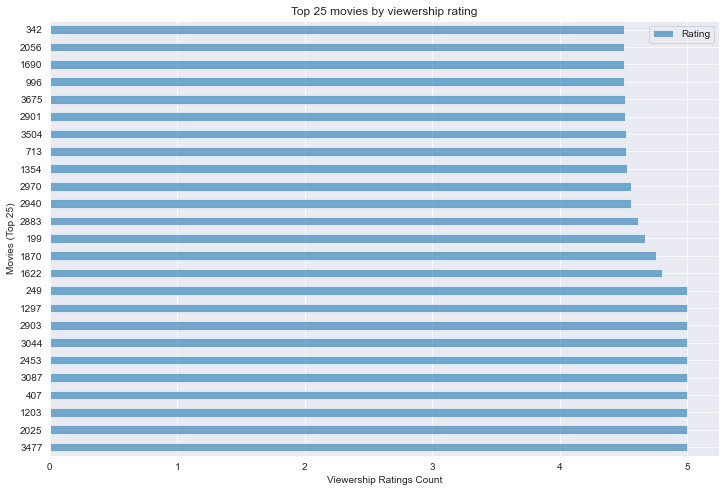

In [45]:
top_25_movies.plot(kind='barh',alpha=0.6,figsize=(12,8))
plt.xlabel("Viewership Ratings Count")
plt.ylabel("Movies (Top 25)")
plt.title("Top 25 movies by viewership rating")
plt.show()

4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [47]:
# Find the User rating data for user 2696
user_rating_data = Master_Data[Master_Data['UserID'] == 2696]
user_rating_data = user_rating_data[['UserID','MovieID','Title','Rating']]
user_rating_data.head(10)

,UserID,MovieID,Title,Rating
24345,2696,1270,Back to the Future (1985),2
29848,2696,1097,E.T. the Extra-Terrestrial (1982),3
244232,2696,1617,L.A. Confidential (1997),4
250014,2696,800,Lone Star (1996),5
273633,2696,3386,JFK (1991),1
277808,2696,3176,"Talented Mr. Ripley, The (1999)",4
371178,2696,1711,Midnight in the Garden of Good and Evil (1997),4
377250,2696,1589,Cop Land (1997),3
598042,2696,1783,Palmetto (1998),4
603189,2696,1892,"Perfect Murder, A (1998)",4


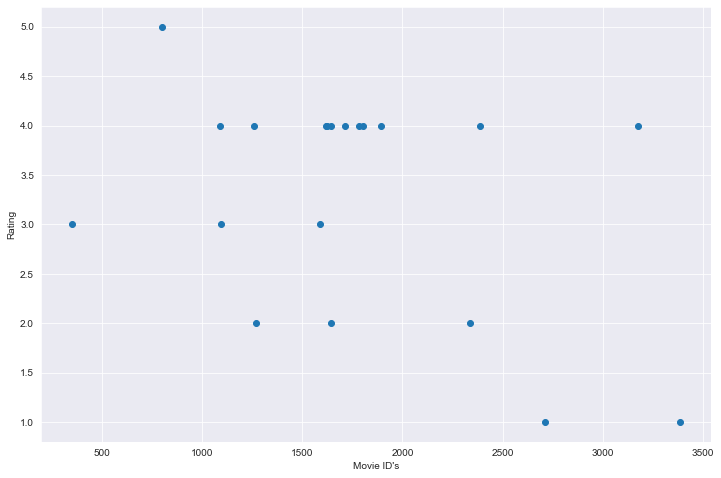

In [50]:
# plot the data
plt.figure(figsize=(12,8))
plt.scatter(x=user_rating_data['MovieID'].head(20), y=user_rating_data['Rating'].head(20))
plt.xlabel("Movie ID's")
plt.ylabel("Rating")
plt.show()

## Feature Engineering

1. Find out all the unique genres

In [59]:
# Genres values in Master_Data
Master_Data['Genres'].tail(10)

1000199                     Drama
1000200         Children's|Comedy
1000201    Action|Sci-Fi|Thriller
1000202                    Comedy
1000203               Documentary
1000204               Documentary
1000205                     Drama
1000206                     Drama
1000207      Comedy|Drama|Western
1000208               Documentary
Name: Genres, dtype: object

In [58]:
genres = Master_Data['Genres'].str.split("|")
genres.tail(5)

1000204               [Documentary]
1000205                     [Drama]
1000206                     [Drama]
1000207    [Comedy, Drama, Western]
1000208               [Documentary]
Name: Genres, dtype: object

In [61]:
# Find out unique Genres
unique_genres = set()

for gen in genres:
    unique_genres = unique_genres.union(set(gen))
    
unique_genres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

In [62]:
# Use get-dummies function to Create seperate column
oneHotGenre = Master_Data["Genres"].str.get_dummies("|")
oneHotGenre.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [63]:
# Concat the Master data with oneHotGenre

oneHotGenre = pd.concat([Master_Data,oneHotGenre],axis=1)
oneHotGenre.head()

,UserID,Gender,Age,Occupation,MovieID,Title,Genres,Rating,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,F,1,10,1193,One Flew Over the Cuckoo's Nest (1975),Drama,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,M,56,16,1193,One Flew Over the Cuckoo's Nest (1975),Drama,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,M,25,12,1193,One Flew Over the Cuckoo's Nest (1975),Drama,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,M,25,7,1193,One Flew Over the Cuckoo's Nest (1975),Drama,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,M,50,1,1193,One Flew Over the Cuckoo's Nest (1975),Drama,5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# see new columns created
oneHotGenre.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'MovieID', 'Title', 'Genres',
       'Rating', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

3. Determine the features affecting the ratings of any particular movie.

In [68]:
Features_Data =Master_Data.copy()
Features_Data

,UserID,Gender,Age,Occupation,MovieID,Title,Genres,Rating
0,1,F,1,10,1193,One Flew Over the Cuckoo's Nest (1975),Drama,5
1,2,M,56,16,1193,One Flew Over the Cuckoo's Nest (1975),Drama,5
2,12,M,25,12,1193,One Flew Over the Cuckoo's Nest (1975),Drama,4
3,15,M,25,7,1193,One Flew Over the Cuckoo's Nest (1975),Drama,4
4,17,M,50,1,1193,One Flew Over the Cuckoo's Nest (1975),Drama,5
...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,2198,Modulations (1998),Documentary,5
1000205,5675,M,35,14,2703,Broken Vessels (1998),Drama,3
1000206,5780,M,18,17,2845,White Boys (1999),Drama,1
1000207,5851,F,18,20,3607,One Little Indian (1973),Comedy|Drama|Western,5


In [69]:
#Fetching the year ehich the movie was released

Features_Data[["Title","Year"]] = Features_Data.Title.str.extract("(.)\s\((.\d+)",expand=True)
Features_Data = Features_Data.drop(['Title'],axis=1)
Features_Data

,UserID,Gender,Age,Occupation,MovieID,Genres,Rating,Year
0,1,F,1,10,1193,Drama,5,1975
1,2,M,56,16,1193,Drama,5,1975
2,12,M,25,12,1193,Drama,4,1975
3,15,M,25,7,1193,Drama,4,1975
4,17,M,50,1,1193,Drama,5,1975
...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,2198,Documentary,5,1998
1000205,5675,M,35,14,2703,Drama,3,1998
1000206,5780,M,18,17,2845,Drama,1,1999
1000207,5851,F,18,20,3607,Comedy|Drama|Western,5,1973


In [70]:
#Calculating the age of movies

Features_Data['Year'] = Features_Data.Year.astype(int)
Features_Data['Movie_Age'] = 2000 -Features_Data['Year']
Features_Data

,UserID,Gender,Age,Occupation,MovieID,Genres,Rating,Year,Movie_Age
0,1,F,1,10,1193,Drama,5,1975,25
1,2,M,56,16,1193,Drama,5,1975,25
2,12,M,25,12,1193,Drama,4,1975,25
3,15,M,25,7,1193,Drama,4,1975,25
4,17,M,50,1,1193,Drama,5,1975,25
...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,2198,Documentary,5,1998,2
1000205,5675,M,35,14,2703,Drama,3,1998,2
1000206,5780,M,18,17,2845,Drama,1,1999,1
1000207,5851,F,18,20,3607,Comedy|Drama|Western,5,1973,27


In [71]:
#Creating Gender variable as integer type

Features_Data['Gender'] = Features_Data.Gender.replace('F',1)
Features_Data['Gender'] = Features_Data.Gender.replace('M',0)
Features_Data['Gender'] = Features_Data.Gender.astype(int)
Features_Data.head()

,UserID,Gender,Age,Occupation,MovieID,Genres,Rating,Year,Movie_Age
0,1,1,1,10,1193,Drama,5,1975,25
1,2,0,56,16,1193,Drama,5,1975,25
2,12,0,25,12,1193,Drama,4,1975,25
3,15,0,25,7,1193,Drama,4,1975,25
4,17,0,50,1,1193,Drama,5,1975,25


In [72]:
#Checking the correlation of features with Rating
Features_Data[['Gender','Occupation', 'Age', 'Movie_Age']].corrwith(Features_Data['Rating'])

Gender        0.019861
Occupation    0.006753
Age           0.056869
Movie_Age     0.156946
dtype: float64

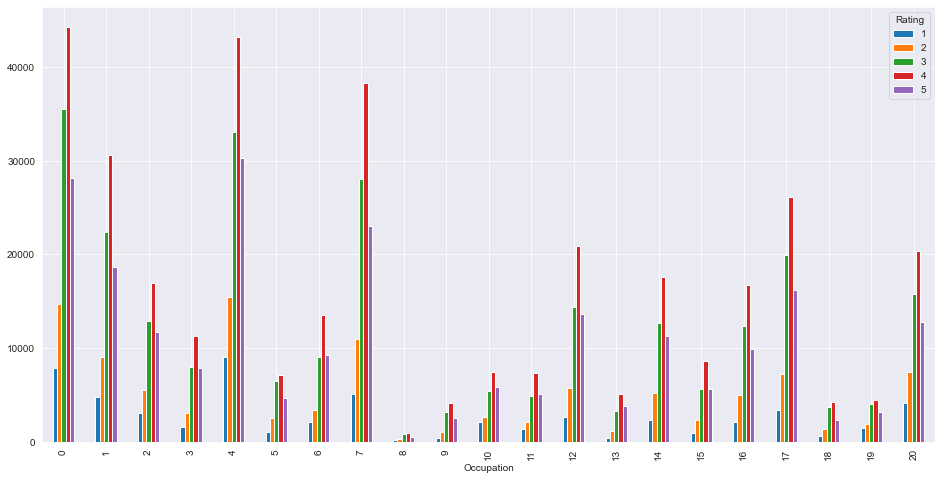

In [85]:
#Occupation relationship with Rating

Features_Data.groupby(["Occupation","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True,figsize=(16,8))
plt.show()


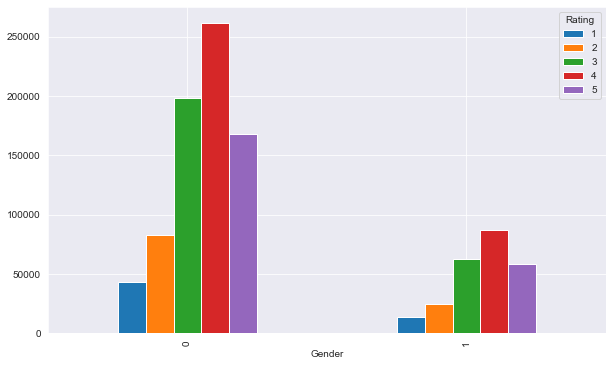

In [89]:
# Gender Relationship with Rating

Features_Data.groupby(["Gender","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True, figsize=(10,6))
plt.show()

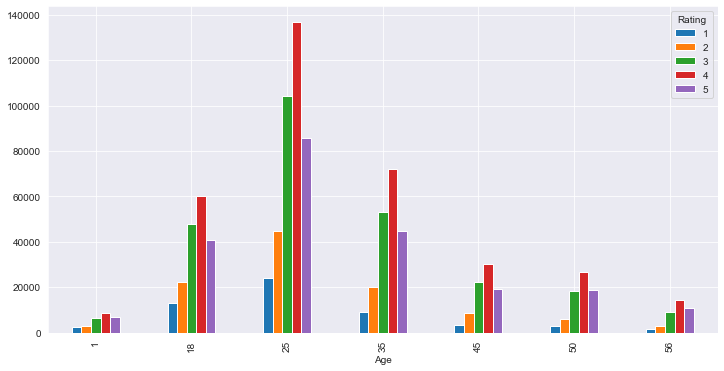

In [91]:
#Age relationship with Rating

Features_Data.groupby(["Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True, figsize=(12,6))
plt.show()

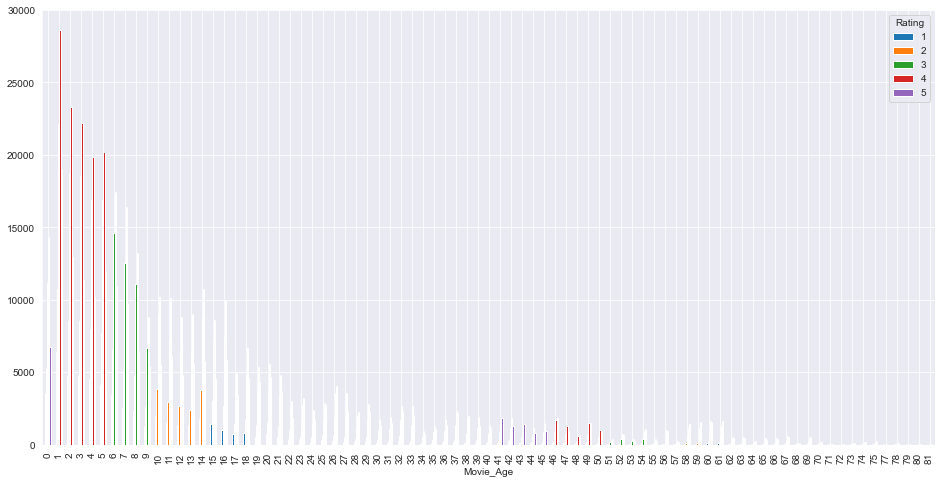

In [95]:
#Movie_Age relationship with Rating
Features_Data.groupby(["Movie_Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True, figsize=(16,8))
plt.show()

4. Develop an appropriate model to predict the movie ratings

In [96]:
# Assign independent variables to X dataset

X = Master_Data[['Age','Occupation','MovieID']].head(500)
X

,Age,Occupation,MovieID
0,1,10,1193
1,56,16,1193
2,25,12,1193
3,25,7,1193
4,50,1,1193
...,...,...,...
495,25,2,1193
496,18,4,1193
497,25,12,1193
498,18,4,1193


In [97]:
# Assign dependent variables to Y dataset
Y = Master_Data['Rating'].head(500)
Y

0      5
1      5
2      4
3      4
4      5
      ..
495    4
496    5
497    5
498    5
499    5
Name: Rating, Length: 500, dtype: int32

In [98]:
# view the shape for both axes
print (X.shape)
print (Y.shape)

(500, 3)
(500,)


In [99]:
# Splitting the data into training & testing datasets(70:30)
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y,random_state=2,test_size=0.3)


In [100]:
# use the Logistic regression estimator

from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [101]:
# fit data into the Logistic regression estimator
logReg.fit(X_train,Y_train)

LogisticRegression()

In [102]:
#Model Evaluation
# predict the outcoome using Logistic regression estimator

y_predict=logReg.predict(X_test)

In [103]:
y_predict

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [104]:
# Calculate the accuracy of the model

from sklearn.metrics import accuracy_score
accuracy_score(y_predict,Y_test)

0.5866666666666667

In [105]:
#Check model performance on new dataset
# create Example object with new values for prediction

X_new = [[25,7,1193],[18,17,2198]]


In [106]:
logReg.predict(X_new)


array([5, 5])

In [107]:
from sklearn import metrics
print (metrics.confusion_matrix(Y_test, y_predict))
print (metrics.classification_report(Y_test, y_predict))

[[ 0  0  0  0  1]
 [ 0  0  0  0  2]
 [ 0  0  0  0  9]
 [ 0  0  0  0 50]
 [ 0  0  0  0 88]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        50
           5       0.59      1.00      0.74        88

    accuracy                           0.59       150
   macro avg       0.12      0.20      0.15       150
weighted avg       0.34      0.59      0.43       150

